We will solve an advection-diffusion problem, $u_t + u_x = 1 + \nu(u_{xx} + u_{yy})$, where $u=0$ on the boundary of the square $[-1,1]^2$.

In [1]:
include("../FNC.jl")
m = 50;  n = 50;
X,Y,d = FNC.rectdisc(m,[-1,1],n,[-1,1]);

The initial condition we specify here is used to impose its boundary values on the solution at all times.

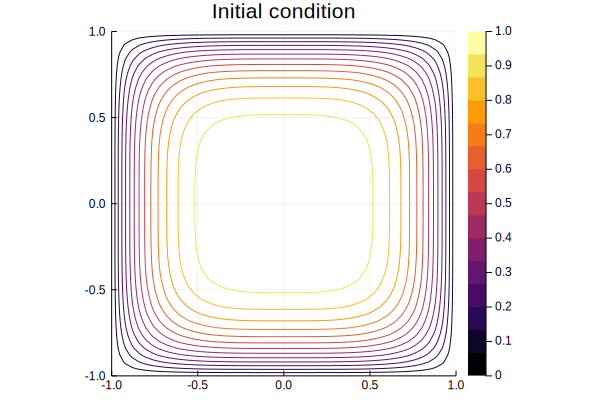

In [2]:
U0 = @. (1-X^4)*(1-Y^4);

using Plots
plot(X[:,1],Y[1,:],U0,match_dimensions=true,aspect_ratio=1,title="Initial condition")

This next function maps the unknowns, given in a vector shape, to a matrix of values including the boundaries.

In [3]:
unpack = function (w)
    U = copy(U0)          # get the boundary right
    U[@. !d.isbndy] .= w  # overwrite the interior
    return U
end

#3 (generic function with 1 method)

The next function drops the boundary values and returns a vector of the interior values. It's the inverse of the `unpack` function.

In [4]:
pack(U) = U[@. !d.isbndy];

This function computes the time derivative at the interior nodes only.

In [5]:
dwdt = function (w,nu,t)
    U = unpack(w)
    Uxx = d.Dxx*U;  Uyy = U*d.Dyy';   # 2nd partials
    dUdt = 1 .- d.Dx*U + nu*(Uxx + Uyy);  # PDE
    return pack(dUdt)
end

#5 (generic function with 1 method)

Since this problem is parabolic, a stiff integrator is a good choice. (The solver usually does fine figuring this out on its own, but here we give it a hint.) 

In [6]:
using DifferentialEquations
IVP = ODEProblem(dwdt,pack(U0),(0.0,1.0),0.05)
sol = solve(IVP,alg_hints=[:stiff]);

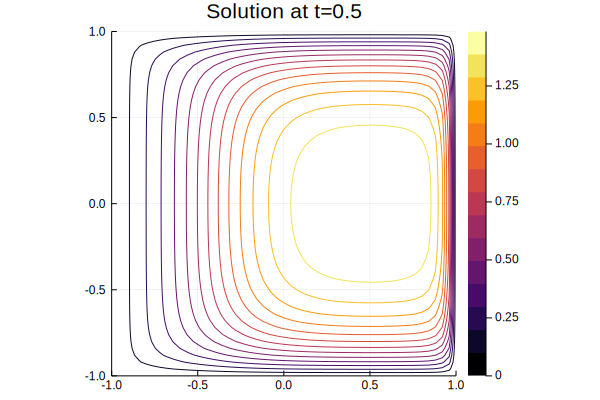

In [7]:
plot(X[:,1],Y[1,:],unpack(sol(0.5)),match_dimensions=true,aspect_ratio=1,
    title="Solution at t=0.5")


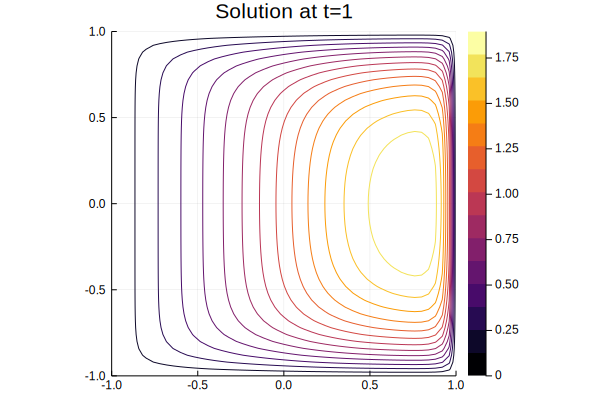

In [8]:
plot(X[:,1],Y[1,:],unpack(sol(1)),match_dimensions=true,aspect_ratio=1,
    title="Solution at t=1")

In [9]:
an = @animate for t in range(0,stop=1,length=80)
    surface(X[:,1],Y[1,:],unpack(sol(t)),match_dimensions=true,aspect_ratio=1,color=:blues,clims=(0,2),
        title="Advection-diffusion solution at t=$(round(t,digits=2))")
end
gif(an,"advdiff2D.gif")

┌ Info: Saved animation to 
│   fn = /Users/driscoll/Dropbox/books/fnc-extras/julia/chapter13/advdiff2D.gif
└ @ Plots /Users/driscoll/.julia/packages/Plots/UQI78/src/animation.jl:90


Plots.AnimatedGif("/Users/driscoll/Dropbox/books/fnc-extras/julia/chapter13/advdiff2D.gif")